# **PROGETTO DSL**
### Chiodo Martina - Bello Renato

A partire da dei dati vocali, si vuole creare una regressione per estrarre l'età dell'oratore.

In [2]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [3]:
# Loading the dataset using Pandas dataframe
data_dev = pd.read_csv('datasets/development.csv')
data_dev = data_dev.drop(columns=['Id'])

# Displaying the first 5 rows of the dataset
print(data_dev.head())

   sampling_rate   age  ... silence_duration                      path
0          22050  24.0  ...        23.846893  audios_development/1.wav
1          22050  22.5  ...        19.388662  audios_development/2.wav
2          22050  22.0  ...        21.640998  audios_development/3.wav
3          22050  22.0  ...        19.644127  audios_development/4.wav
4          22050  22.0  ...        18.041905  audios_development/5.wav

[5 rows x 19 columns]


In [4]:
# Do we have some missing values?
null_values = data_dev.isnull().sum()
print("Count total NaN at each column in a DataFrame : \n\n", 
      null_values) 


Count total NaN at each column in a DataFrame : 

 sampling_rate             0
age                       0
gender                    0
ethnicity                 0
mean_pitch                0
max_pitch                 0
min_pitch                 0
jitter                    0
shimmer                   0
energy                    0
zcr_mean                  0
spectral_centroid_mean    0
tempo                     0
hnr                       0
num_words                 0
num_characters            0
num_pauses                0
silence_duration          0
path                      0
dtype: int64


In [5]:
# One-hot encoding for attribute gender and ethnicity
from collections import Counter
counts = dict(Counter(data_dev.ethnicity))
print('Numero di etnie', len(counts))

data_dev = pd.get_dummies(data_dev,columns=['ethnicity','gender'])
data_dev

Numero di etnie 165


,sampling_rate,age,mean_pitch,max_pitch,min_pitch,jitter,shimmer,energy,zcr_mean,spectral_centroid_mean,tempo,hnr,num_words,num_characters,num_pauses,silence_duration,path,ethnicity_afemai,ethnicity_agni,ethnicity_akan,ethnicity_albanian,ethnicity_amazigh,ethnicity_amharic,ethnicity_annang,ethnicity_arabic,ethnicity_armenian,ethnicity_ashanti,ethnicity_azerbaijani,ethnicity_bafang,ethnicity_baga,ethnicity_bai,ethnicity_bambara,ethnicity_bamun,ethnicity_bari,ethnicity_basque,ethnicity_bavarian,ethnicity_belarusan,ethnicity_bengali,ethnicity_bosnian,ethnicity_bulgarian,...,ethnicity_mizo,ethnicity_moba,ethnicity_mongolian,ethnicity_moore,ethnicity_mortlockese,ethnicity_nama,ethnicity_nandi,ethnicity_naxi,ethnicity_nepali,ethnicity_newari,ethnicity_ngemba,ethnicity_nigerian,ethnicity_norwegian,ethnicity_nuer,ethnicity_obudu,ethnicity_oriya,ethnicity_oromo,ethnicity_papiamentu,ethnicity_pashto,ethnicity_pohnpeian,ethnicity_polish,ethnicity_portuguese,ethnicity_pulaar,ethnicity_punjabi,ethnicity_quechua,ethnicity_romanian,ethnicity_rotuman,ethnicity_rundi,ethnicity_russian,ethnicity_rwanda,ethnicity_sa'a,ethnicity_sardinian,ethnicity_sarua,ethnicity_satawalese,ethnicity_tiv,ethnicity_ukwani,ethnicity_urhobo,ethnicity_yoruba,gender_female,gender_male
0,22050,24.0,1821.69060,3999.7170,145.43066,0.013795,0.082725,0.002254,0.210093,3112.257251,[151.99908088],-123.999726,69,281,39,23.846893,audios_development/1.wav,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
1,22050,22.5,1297.81870,3998.8590,145.37268,0.025349,0.096242,0.007819,0.078849,1688.016389,[129.19921875],-86.928478,69,281,21,19.388662,audios_development/2.wav,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,22050,22.0,1332.85240,3998.8025,145.42395,0.019067,0.119456,0.002974,0.105365,2576.901706,[117.45383523],-98.450670,69,281,1,21.640998,audios_development/3.wav,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
3,22050,22.0,1430.34990,3998.4510,147.98083,0.017004,0.102389,0.022371,0.173701,3269.751413,[117.45383523],-56.459762,69,281,9,19.644127,audios_development/4.wav,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
4,22050,22.0,1688.72340,3998.6113,145.44772,0.028027,0.124831,0.005369,0.107279,1930.897375,[112.34714674],-80.349204,69,281,11,18.041905,audios_development/5.wav,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,..

We have no missing values.

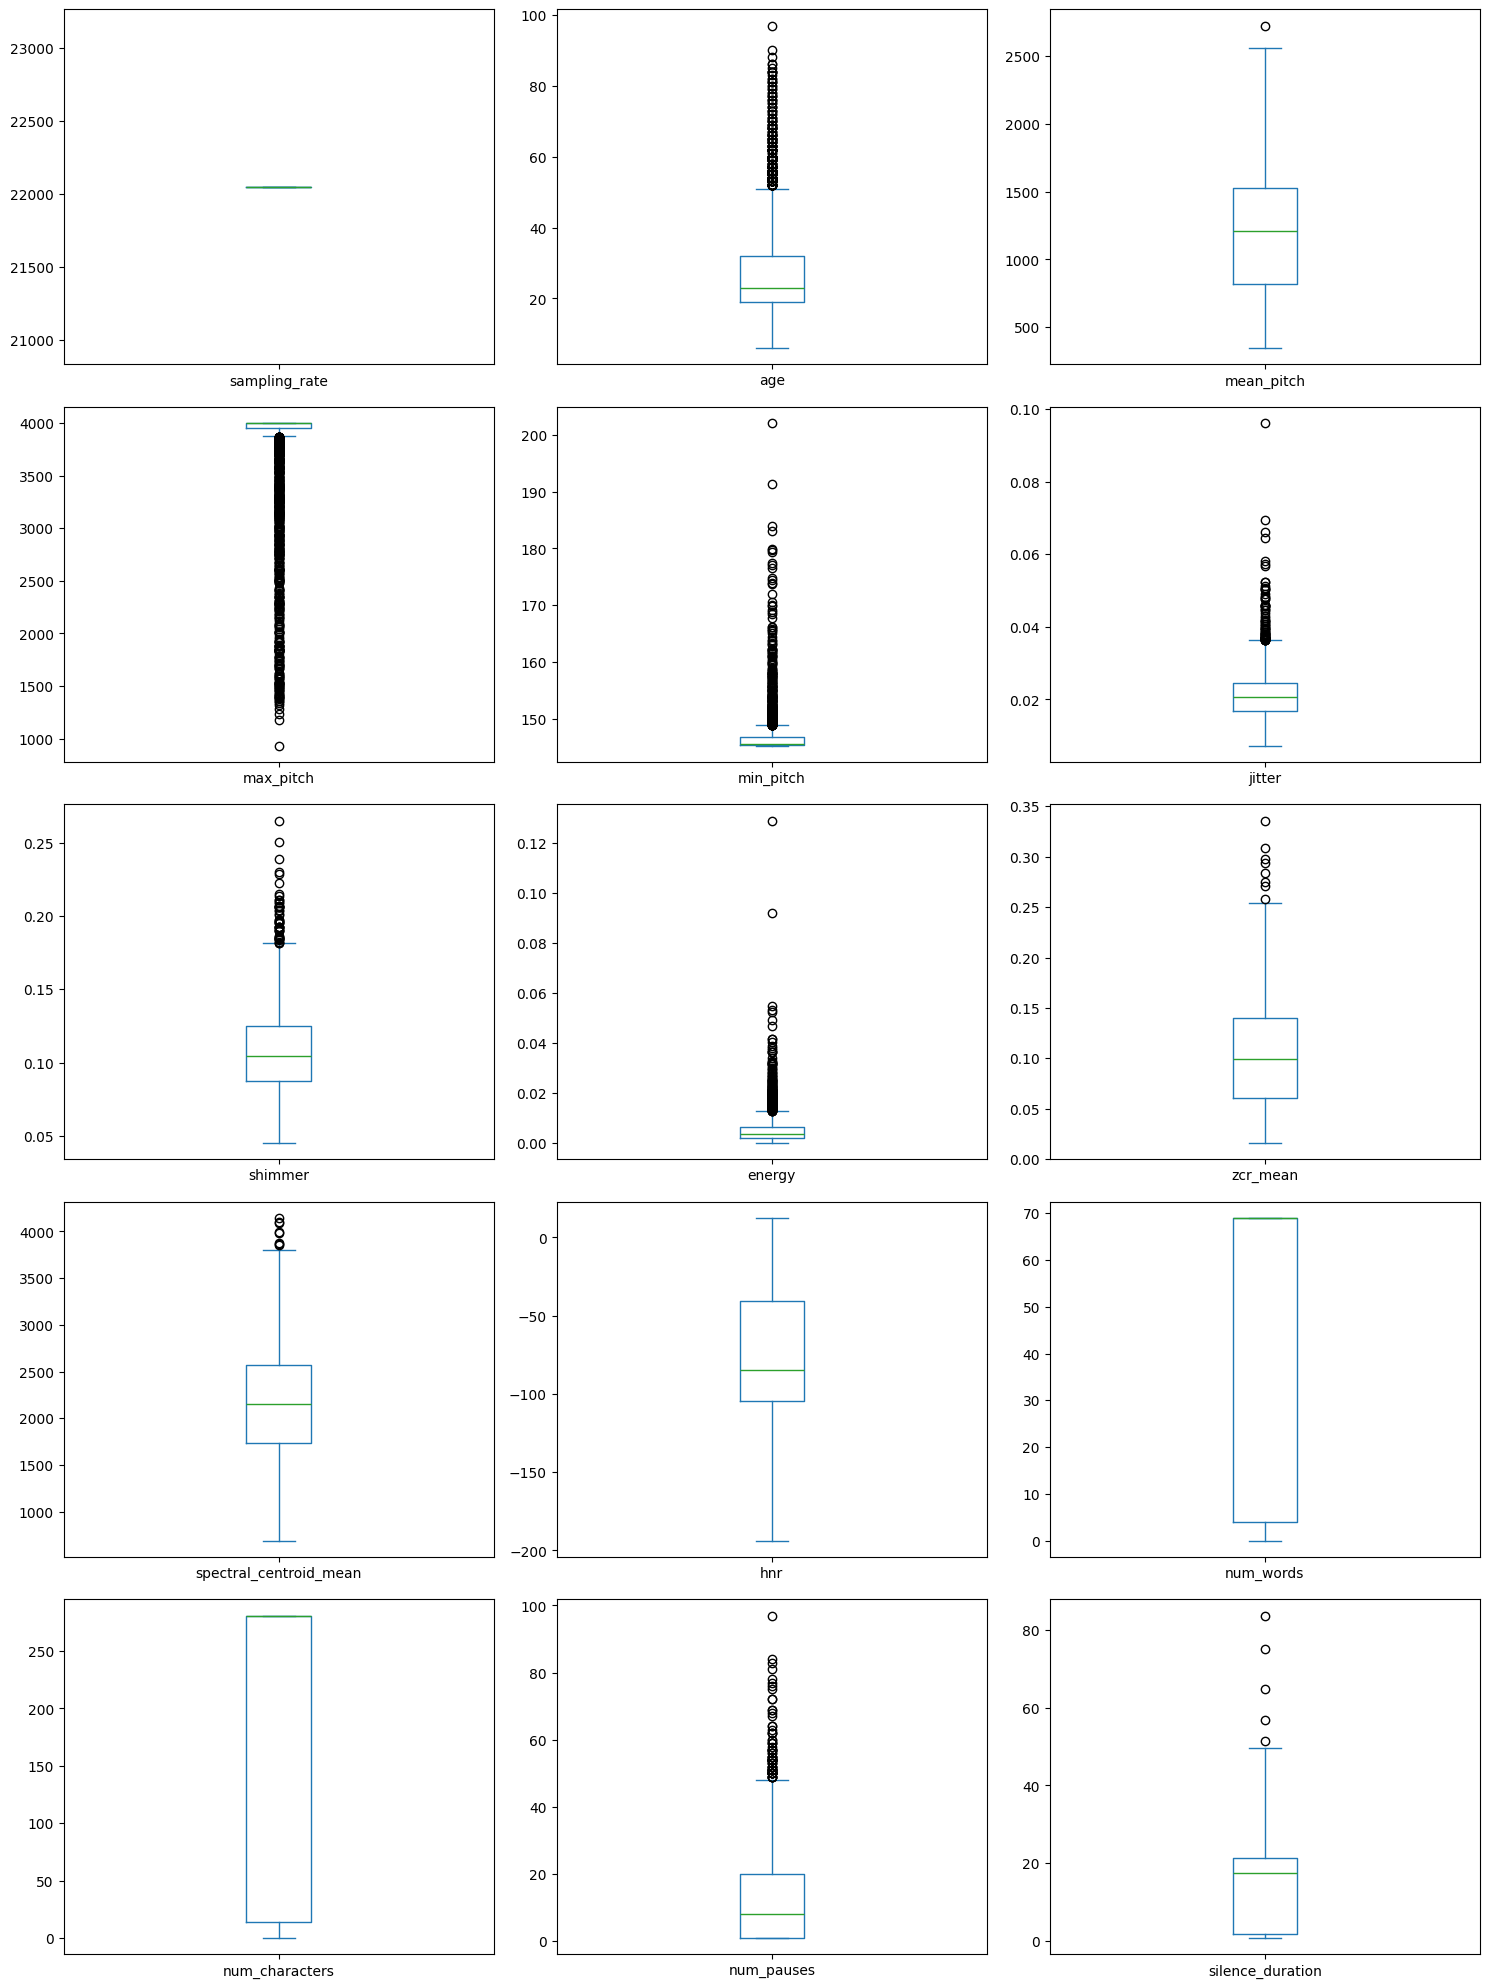

In [6]:
# Some plots to understand the data

labels = list(data_dev.columns)
labels.remove('path')

data_dev[labels].plot(kind='box', subplots=True, layout=(5, 3), figsize=(15, 20), sharex=False, sharey=False)
plt.tight_layout()
plt.show()


In [7]:
# First, let's convert tempo in a float data type
data_dev['tempo'] = data_dev['tempo'].str.replace('[','')
data_dev['tempo'] = data_dev['tempo'].str.replace(']','').astype(float)
data_dev

,sampling_rate,age,mean_pitch,max_pitch,min_pitch,jitter,shimmer,energy,zcr_mean,spectral_centroid_mean,tempo,hnr,num_words,num_characters,num_pauses,silence_duration,path,ethnicity_afemai,ethnicity_agni,ethnicity_akan,ethnicity_albanian,ethnicity_amazigh,ethnicity_amharic,ethnicity_annang,ethnicity_arabic,ethnicity_armenian,ethnicity_ashanti,ethnicity_azerbaijani,ethnicity_bafang,ethnicity_baga,ethnicity_bai,ethnicity_bambara,ethnicity_bamun,ethnicity_bari,ethnicity_basque,ethnicity_bavarian,ethnicity_belarusan,ethnicity_bengali,ethnicity_bosnian,ethnicity_bulgarian,...,ethnicity_mizo,ethnicity_moba,ethnicity_mongolian,ethnicity_moore,ethnicity_mortlockese,ethnicity_nama,ethnicity_nandi,ethnicity_naxi,ethnicity_nepali,ethnicity_newari,ethnicity_ngemba,ethnicity_nigerian,ethnicity_norwegian,ethnicity_nuer,ethnicity_obudu,ethnicity_oriya,ethnicity_oromo,ethnicity_papiamentu,ethnicity_pashto,ethnicity_pohnpeian,ethnicity_polish,ethnicity_portuguese,ethnicity_pulaar,ethnicity_punjabi,ethnicity_quechua,ethnicity_romanian,ethnicity_rotuman,ethnicity_rundi,ethnicity_russian,ethnicity_rwanda,ethnicity_sa'a,ethnicity_sardinian,ethnicity_sarua,ethnicity_satawalese,ethnicity_tiv,ethnicity_ukwani,ethnicity_urhobo,ethnicity_yoruba,gender_female,gender_male
0,22050,24.0,1821.69060,3999.7170,145.43066,0.013795,0.082725,0.002254,0.210093,3112.257251,151.999081,-123.999726,69,281,39,23.846893,audios_development/1.wav,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
1,22050,22.5,1297.81870,3998.8590,145.37268,0.025349,0.096242,0.007819,0.078849,1688.016389,129.199219,-86.928478,69,281,21,19.388662,audios_development/2.wav,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,22050,22.0,1332.85240,3998.8025,145.42395,0.019067,0.119456,0.002974,0.105365,2576.901706,117.453835,-98.450670,69,281,1,21.640998,audios_development/3.wav,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
3,22050,22.0,1430.34990,3998.4510,147.98083,0.017004,0.102389,0.022371,0.173701,3269.751413,117.453835,-56.459762,69,281,9,19.644127,audios_development/4.wav,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
4,22050,22.0,1688.72340,3998.6113,145.44772,0.028027,0.124831,0.005369,0.107279,1930.897375,112.347147,-80.349204,69,281,11,18.041905,audios_development/5.wav,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,..

In [8]:
# Dividing the dataset into development and validation
X_train_valid, X_test, y_train_valid, y_test = train_test_split(data_dev.drop(columns=['path', 'age']), data_dev['age'], test_size=0.2, random_state=42)
X_train_valid.shape, X_test.shape, y_train_valid.shape, y_test.shape

standard_scaler = StandardScaler()
standard_scaler.fit_transform(X_train_valid)
standard_scaler.transform(X_test)

array([[ 0.        ,  0.33429385,  0.32911017, ..., -0.06205716,
         1.00684354, -1.00684354],
       [ 0.        , -0.83227257,  0.39947195, ..., -0.06205716,
         1.00684354, -1.00684354],
       [ 0.        , -1.61344236, -1.67857834, ..., -0.06205716,
        -0.99320298,  0.99320298],
       ...,
       [ 0.        ,  0.6523893 ,  0.38345488, ..., -0.06205716,
         1.00684354, -1.00684354],
       [ 0.        ,  0.1315472 ,  0.40187583, ..., -0.06205716,
        -0.99320298,  0.99320298],
       [ 0.        ,  1.38973105,  0.40774368, ..., -0.06205716,
        -0.99320298,  0.99320298]])

## LEARNING THE REGRESSION MODEL

In [9]:
from sklearn.metrics import root_mean_squared_error
from sklearn.linear_model import LinearRegression

# Initialize the model
model = LinearRegression()

# Fit the model
model.fit(X_train_valid, y_train_valid)
score = root_mean_squared_error(y_test, model.predict(X_test))
score

10.070785791367246

In [10]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model

model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
model.fit(X_train_valid, y_train_valid)

# Evaluate the model
score = root_mean_squared_error(y_test, model.predict(X_test))
score


10.05324041092202

In [11]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the model  
model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Fit the model
model.fit(X_train_valid, y_train_valid)

# Evaluate the model
score = root_mean_squared_error(y_test, model.predict(X_test))
score

9.857299426401745

In [12]:
from sklearn.linear_model import Lasso


# Initialize the model
model = Lasso(alpha=23, random_state=42)

# Fit the model
model.fit(X_train_valid, y_train_valid)

# Evaluate the model
score = root_mean_squared_error(y_test, model.predict(X_test))
score


10.92075088758093

In [13]:
from sklearn.linear_model import Ridge

# Initialize the model
model = Ridge(alpha=0.5)

# Fit the model
model.fit(X_train_valid, y_train_valid)

# Evaluate the model
score = root_mean_squared_error(y_test, model.predict(X_test))
score


10.07805426471569

In [14]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Initialize the model
model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())

# Fit the model
model.fit(X_train_valid, y_train_valid)

# Evaluate the model
score = root_mean_squared_error(y_test, model.predict(X_test))
score


27.52865193033791

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline  
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import ElasticNet


X_train_valid, X_test, y_train_valid, y_test = train_test_split(data_dev.drop(columns=['path', 'age']), data_dev['age'], test_size=0.2, random_state=42)

models_and_params = {
    
    """ 'LinearRegression': {
        'model': LinearRegression(),
        'params': {}  # La regressione lineare di base non ha iperparametri
    },
    'Ridge': {
        'model': Ridge(),
        'params': {
            'alpha': [0.1, 1, 10, 100],  # Valori di regolarizzazione
            'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg']
        }
    },
    'Lasso': {
        'model': Lasso(),
        'params': {
            'alpha': [0.01, 0.1, 1, 10],  # Valori di regolarizzazione
            'max_iter': [1000, 5000, 10000]
        }
    },
    'PolynomialRegression': {
        'model': Pipeline([
            ('poly', PolynomialFeatures()),  # Trasformazione polinomiale
            ('linear', LinearRegression())  # Regressione lineare
        ]),
        'params': {
            'poly__degree': [2, 3, 4],  # Grado del polinomio
            'linear__fit_intercept': [True, False]
        }
    },
    'MLPRegressor': {
        'model': MLPRegressor(),
        'params': {
            'hidden_layer_sizes': [(50,), (100,), (50, 50)],  # Numero di neuroni nei layer nascosti
            'activation': ['relu', 'tanh', 'logistic'],  # Funzione di attivazione
            'solver': ['adam'],  # Ottimizzatore
            'learning_rate': ['constant', 'invscaling', 'adaptive'],  # Metodo di aggiornamento del learning rate
            'max_iter': [1000],  # Numero massimo di iterazioni
            'alpha': [ 0.001, 0.01]  # Regularization strength
        }
    },
    'SVR': {
        'model': SVR(),
        'params': {
            'kernel': ['linear', 'rbf', 'poly'],
            'C': [0.1, 1, 10, 100],
            'gamma': ['scale', 'auto']
        }
    },
     """
     
    'RandomForestRegressor': {
        'model': RandomForestRegressor(),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5],
        }
    },
     'PolynomialRegression': {
        'model': Pipeline([
            ('poly', PolynomialFeatures()),  # Trasformazione polinomiale
            ('linear', LinearRegression())  # Regressione lineare
        ]),
        'params': {
            'poly__degree': [2, 3, 4],  # Grado del polinomio
            'linear__fit_intercept': [True, False]
        }
    },
    'KNNRegressor': {
        'model': KNeighborsRegressor(),
        'params': {
            'n_neighbors': [3, 5, 7, 10],
            'weights': ['uniform', 'distance'],
            'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
            'leaf_size': [30, 50, 100]
        }
    },
    'ElasticNet': {
        'model': ElasticNet(),
        'params': {
            'alpha': [0.01, 0.1, 1, 10],
            'l1_ratio': [0.1, 0.5, 0.7, 1.0],  # 1.0 => Lasso, 0 => Ridge
            'max_iter': [1000]
        }
    }
    
}


results = {}

for model_name, model_details in models_and_params.items():
    print(f"\nEseguendo GridSearchCV per {model_name}...")
    
    # Creare la grid search
    grid_search = GridSearchCV(
        estimator=model_details['model'],
        param_grid=model_details['params'],
        cv=5,  # Numero di fold per la cross-validation
        scoring='neg_mean_squared_error',  # Usare MSE come metrica di valutazione
        n_jobs=-1
    )
    
    # Addestrare il modello
    grid_search.fit(X_train_valid, y_train_valid)
    
    # Salvare i risultati
    results[model_name] = {
        'best_params': grid_search.best_params_,
        'best_score': -grid_search.best_score_  # Invertire il segno per MSE
    }
    
    print(f"Migliori parametri per {model_name}: {grid_search.best_params_}")
    print(f"Miglior MSE (cross-val): {results[model_name]['best_score']:.4f}")

    # Valutazione sui dati di test
    y_pred = grid_search.best_estimator_.predict(X_test)
    rmse_test = root_mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"RMSE sui dati di test: {rmse_test:.4f}")
    print(f"R^2 sui dati di test: {r2:.4f}")


Eseguendo GridSearchCV per 
    'LinearRegression': {
        'model': LinearRegression(),
        'params': {}  # La regressione lineare di base non ha iperparametri
    },
    'Ridge': {
        'model': Ridge(),
        'params': {
            'alpha': [0.1, 1, 10, 100],  # Valori di regolarizzazione
            'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg']
        }
    },
    'Lasso': {
        'model': Lasso(),
        'params': {
            'alpha': [0.01, 0.1, 1, 10],  # Valori di regolarizzazione
            'max_iter': [1000, 5000, 10000]
        }
    },
    'PolynomialRegression': {
        'model': Pipeline([
            ('poly', PolynomialFeatures()),  # Trasformazione polinomiale
            ('linear', LinearRegression())  # Regressione lineare
        ]),
        'params': {
            'poly__degree': [2, 3, 4],  # Grado del polinomio
            'linear__fit_intercept': [True, False]
        }
    },
    'MLPRegressor': {
        'model': MLPRegressor()